# To do
* ask Julie what she wants
* check taxes municipales, frais de maintenance

In [28]:
%reload_ext autoreload

import pandas as pd

In [29]:
%autoreload 2
from rent_or_buy import Scenario

In [ ]:
rent = Scenario(100000, 2500, 2000, 500e3, 100e3,
                    0.03, 0.03, 0.05, 0.09)

In [42]:
buy = Scenario(110000, 2500, 1200, 500e3, 100e3,
                    0.03, 0.03, 0.05, 0.09)
buy.simulate_buying()

stocks = []
names = ['capital', 'house', 'mortgage']
for stock in names:
    stocks.append(pd.Series(getattr(buy, stock).value))

df = pd.concat(stocks, axis=1, keys=names)
df['net_assets_buy'] = df.capital + df.house - df.mortgage
df['capital_buy'] = df.capital

rent.simulate_renting()
df['capital_rent'] = pd.Series(rent.capital.value)

df.plot(grid=True);

AssertionError: insufficient capital, need an extra $2600.9048358440778

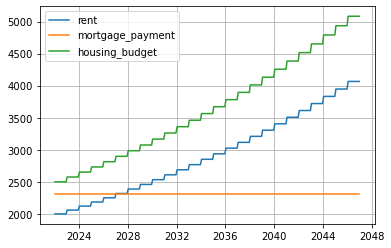

In [54]:
df_flows = pd.DataFrame()
df_flows['rent'] = pd.Series(rent.rent)
df_flows['mortgage_payment'] = buy.mortgage.monthly_payment
df_flows['housing_budget'] = pd.Series(rent.housing_budget)
df_flows.plot(grid=True);